In [73]:
import Pyro4
import pandas as pd
import numpy as np
import psycopg2
from sklearn import manifold
from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection
%matplotlib inline

In [30]:
# connect to db
user = 'lindsay'         
host = 'localhost'
dbname = 'podcast'
con = None
con = psycopg2.connect(database = dbname, user = user)
cursor = con.cursor()

# connect to simserver
service = Pyro4.Proxy(Pyro4.locateNS().lookup('gensim.testserver'))

In [43]:
# load distance matrix
distance_matrix = np.load('gensim/distance_matrix.npy')

In [31]:
# retrieve top 100 similarities for a podcast
sim_results = service.find_similar('17233')

In [90]:
# download the list of podcast IDs
pod_ids = pd.read_sql_query("SELECT id, name FROM podcast;", con)

In [92]:
# filter for top 100
sim_results_ids = [int(x[0]) for x in sim_results]
pod_ids = pod_ids[pod_ids['id'].isin(sim_results_ids)]

In [69]:
# select rows/columns from distance_matrix
sub_matrix = distance_matrix[pod_ids.index,:][:,pod_ids.index]

In [70]:
sub_matrix.shape

(100, 100)

In [80]:
mds = manifold.MDS(dissimilarity="precomputed")

In [81]:
mds2d = mds.fit(sub_matrix).embedding_

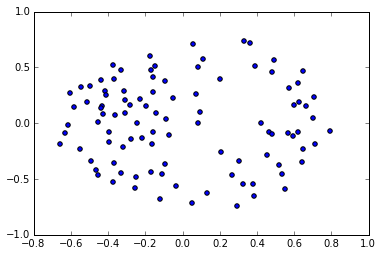

In [89]:
plt.scatter(mds2d[:,0], mds2d[:,1])

In [100]:
# add MDS x & y to pod_ids
pod_ids['x_coord'] = mds2d[:,0].tolist()
pod_ids['y_coord'] = mds2d[:,1].tolist()

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [107]:
pod_ids['searched'] = [False] * pod_ids.shape[0]

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [112]:
pod_ids.loc[pod_ids['id'] == podcast_id]['searched'] = True

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [126]:
pod_ids['searched'][pod_ids['id'] == podcast_id] = True

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
//anaconda/lib/python2.7/site-packages/pandas/core/generic.py:4059: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
//anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:3066: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [127]:
pod_ids[pod_ids['searched'] == True]

,id,name,x_coord,y_coord,searched
1634,17233,Slate's Political Gabfest,0.423313,-0.000045,True


Int64Index([1634], dtype='int64')

In [128]:
sim_results

[(u'17233', 1.0, None),
 (u'17231', 0.895520269871, None),
 (u'17227', 0.861769497395, None),
 (u'17230', 0.848702907562, None),
 (u'17229', 0.84683072567, None),
 (u'17234', 0.750077009201, None),
 (u'17232', 0.457496285439, None),
 (u'17132', 0.43675583601, None),
 (u'14682', 0.422378510237, None),
 (u'12834', 0.333756119013, None),
 (u'14976', 0.327730834484, None),
 (u'17142', 0.304219514132, None),
 (u'13624', 0.296823740005, None),
 (u'15712', 0.284045040607, None),
 (u'15640', 0.269756823778, None),
 (u'14360', 0.263869285583, None),
 (u'13312', 0.23943784833, None),
 (u'12521', 0.230023130774, None),
 (u'16139', 0.22893191874, None),
 (u'17749', 0.227231472731, None),
 (u'16512', 0.222497597337, None),
 (u'15878', 0.218795180321, None),
 (u'13503', 0.208373144269, None),
 (u'18251', 0.207704767585, None),
 (u'16399', 0.207693621516, None),
 (u'12841', 0.201917544007, None),
 (u'15566', 0.201799347997, None),
 (u'16962', 0.200307190418, None),
 (u'15539', 0.197928950191, None),
